## Summary of BART base score results
### On automatic metrics

In [41]:
# load scores
import pandas as pd

base_scores = pd.read_csv("base_scores.csv", sep=",", header=0)
base_scores

,original,simplified,generated,sari,bleu,bert_f1,bert_pre,bert_rec
0,彼らは凍死した。,彼らは寒くなりすぎて、死んでしまった。,彼らは寒くて死んだ。,91.666667,0.311604,0.904811,0.939774,0.872357
1,では始めましょう。,では始めましょう。,では始めましょう。,NaN,NaN,NaN,NaN,NaN
2,その子供たちは歌いながら去って行った。,その子供たちは歌いながらどこかへ行った。,その子供たちは歌いながら出て行った。,91.666667,0.592890,0.924027,0.945746,0.903284
3,彼はクラスの他のどの少年よりも速く泳げる。,彼はクラスの他のどの少年よりも速く泳ぐことができる。,彼はクラスの他のどの少年よりも速く泳ぐことができる。,100.000000,0.900088,1.000000,1.000000,1.000000
4,彼女は私の成功をねたんでいる。,彼女は私の成功を悪く思っている。,彼女は私の成功を見て自分もそうなりたいと思っている。,91.666667,0.526009,0.890681,0.850680,0.934629
...,...,...,...,...,...,...,...,...
4995,今晩、うちに泊まってはどうですか。,今日の夜、うちで夜を過ごしてはどうですか。,今夜、うちに滞在してはどうですか。,91.666667,0.381811,0.868071,0.885671,0.851157
4996,彼は読書のしすぎで目を痛めた。,彼は長い時間本を読んで目を痛くなった。,彼は本を読むことが不足していると思った。,91.666667,0.264266,0.807420,0.812987,0.801928
4997,彼は自分の車を持っている。,彼は自分の車を持っている。,彼は自分の車を持っている。,NaN,NaN,NaN,NaN,NaN
4998,そのチームは誰がコーチをしているのですか。,そのチームは誰が指導しているのですか。,そのチームは誰が指導をしているのですか。,91.666667,0.794069,0.981463,0.981463,0.981463


In [42]:
# median and mean of each scores

sari_mean = base_scores['sari'].mean()
bleu_mean = base_scores['bleu'].mean()
bertf1_mean = base_scores['bert_f1'].mean()

print("bleu", bleu_mean)
print("sari", sari_mean)
print('bert', bertf1_mean)

bleu 0.6664571788618259
sari 94.34949424485525
bert 0.9438493610426321


### Manual Evaluation

In [43]:
anno = pd.read_csv("annotated_base.csv", sep=",", header=0)
anno

,Unnamed: 0,original,generated,plainness1,synonymity1,grammaticality1,plainness2,synonymity2,grammaticality2
0,3206,彼は裏金をもらいました。,彼は裏に金をもらいました。,2,1,2,2,2,2
1,2785,お手伝いしようか。,手伝いしようか。,2,3,2,2,3,3
2,4644,網にかかったものは何でも魚だ。,海の流れにかかったものは何でも魚だ。,2,1,2,3,1,3
3,1324,私たちは互いに慰め合った。,私たちは互いに話した。,3,2,3,3,1,3
4,627,船便で行くといくらになりますか。,船で行くといくらになりますか。,2,3,3,2,1,3
...,...,...,...,...,...,...,...,...,...
295,2800,君の車に私を乗せて下さい。,あなたの車に私を乗らせてください。,3,3,2,2,3,2
296,3470,私たちはものすごい雪のために遅れた。,私たちは多く雪のために遅れた。,2,2,2,2,3,1
297,1051,彼女は年寄りに親切です。,彼女は年をとって力のない人に親切です。,3,2,3,2,2,3
298,2095,風が凪いだ。,風が弱くなった。,3,3,3,3,3,3


#### Cohen's Kappa

In [45]:
plainness1 = anno['plainness1']
plainness2 = anno['plainness2']
synonymity1 = anno['synonymity1']
synonymity2 = anno['synonymity2']
grammaticality1 = anno['grammaticality1'] 
grammaticality2 = anno['grammaticality2']

In [46]:
from sklearn.metrics import cohen_kappa_score

print("c_plainness is ", cohen_kappa_score(plainness1, plainness2))
print("c_synonymity is ", cohen_kappa_score(synonymity1, synonymity2))
print("c_grammaticality is ", cohen_kappa_score(grammaticality1, grammaticality2))


c_plainness is  0.409707039790118
c_synonymity is  0.6182049572753168
c_grammaticality is  0.41946719989679415


#### Rated as 3?

In [47]:
def printout(data1, data2, criteria):
    count_anno1 = len([i for i in data1 if i==3])
    count_anno2 = len([i for i in data2 if i==3])
    print('{}:3 according to annotator1: {} in total, i.e. {} % of the data'.format(criteria, count_anno1, 100 * round(count_anno1 / len(data1), 4)))
    print('{}:3 according to annotator2: {} in total, i.e. {} % of the data'.format(criteria, count_anno2, 100 * round(count_anno2 / len(data2), 4)))

In [40]:
printout(plainness1, plainness2, 'plainness')
printout(synonymity1, synonymity2, 'synonymity')
printout(grammaticality1, grammaticality2, 'grammaticality')

plainness:3 according to annotator1: 134 in total, i.e. 44.67 % of the data
plainness:3 according to annotator2: 155 in total, i.e. 51.67 % of the data
synonymity:3 according to annotator1: 175 in total, i.e. 58.330000000000005 % of the data
synonymity:3 according to annotator2: 192 in total, i.e. 64.0 % of the data
grammaticality:3 according to annotator1: 232 in total, i.e. 77.33 % of the data
grammaticality:3 according to annotator2: 247 in total, i.e. 82.33 % of the data


In [52]:
print("all elements are 3 (well simplified) for annotator1: ", \
    100 * round(anno[(anno['plainness1'] == 3) & (anno['synonymity1'] == 3) & (anno['grammaticality1'] == 3)]['original'].count() /300, 4), "%")

print("all elements are 3 (well simplified) for annotator2: ", \
    100 * round(anno[(anno['plainness2'] == 3) & (anno['synonymity2'] == 3) & (anno['grammaticality2'] == 3)]['original'].count() / 300, 4), "%")

all elements are 3 (well simplified) for annotator1:  33.67 %
all elements are 3 (well simplified) for annotator2:  32.67 %


#### Confusion Matrix

In [13]:
# modified from https://gist.github.com/mesquita/f6beffcc2579c6f3a97c9d93e278a9f1
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, classes, criteria, ymap=None, figsize=(10,10)):
    sns.set(font_scale=2.0)

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            annot[i, j] = '%d' % (c)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm = cm * 100
    cm.index.name = 'Annotator2'
    cm.columns.name = 'Annotator1'
    fig, ax = plt.subplots(figsize=figsize)
    plt.yticks(va='center')
    plt.title(criteria)

    sns.heatmap(cm, annot=annot, fmt='', ax=ax, xticklabels=classes, cbar=False, yticklabels=classes)

##### Plainness

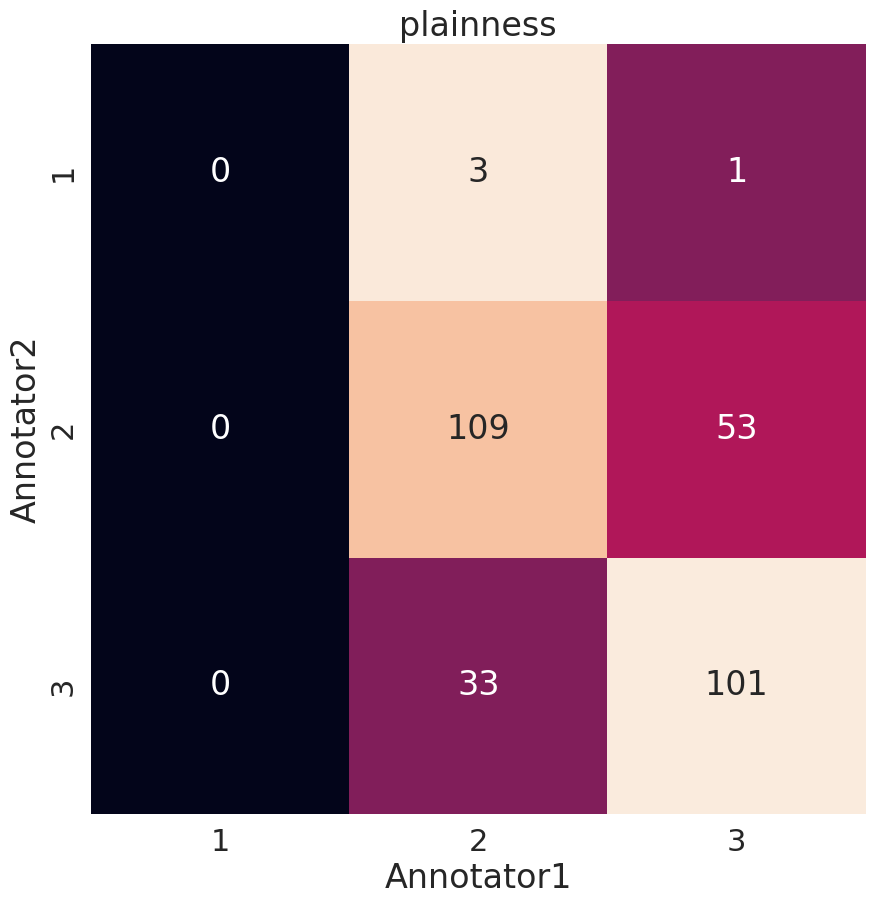

In [14]:
cm_analysis(plainness1, plainness2, labels=[1, 2, 3], classes=[1, 2, 3], criteria='plainness', ymap=None)

##### Synonymity

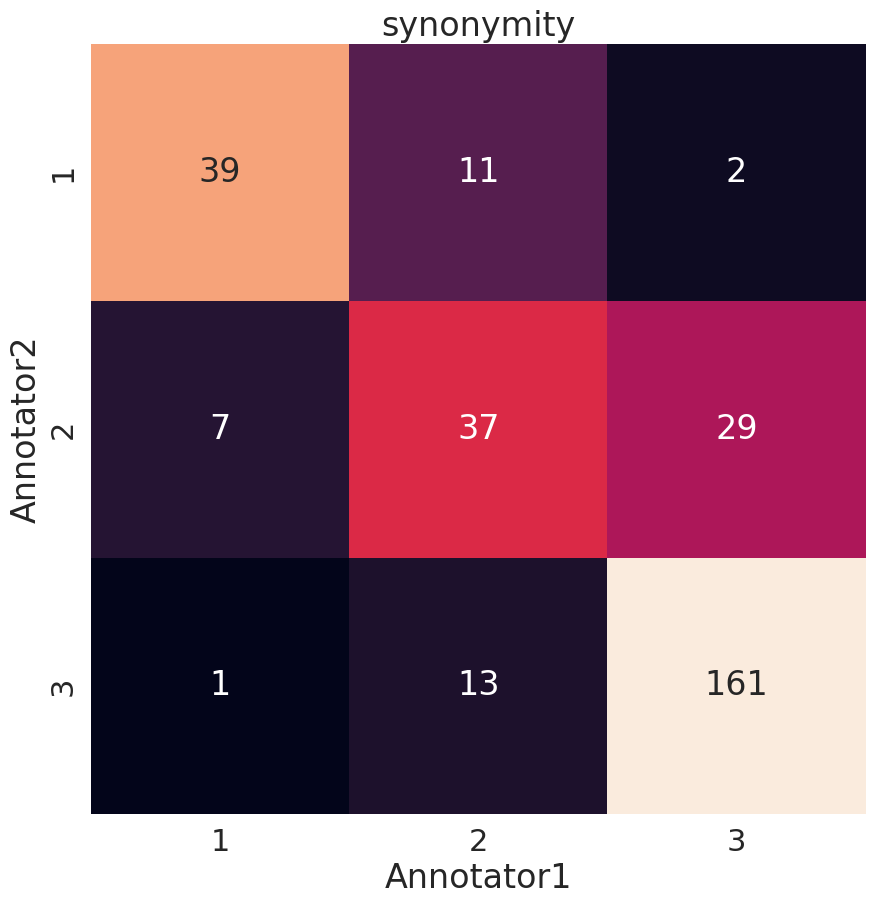

In [15]:
cm_analysis(synonymity1, synonymity2, labels=[1, 2, 3], classes=[1, 2, 3], criteria='synonymity', ymap=None)

##### Grammaticality

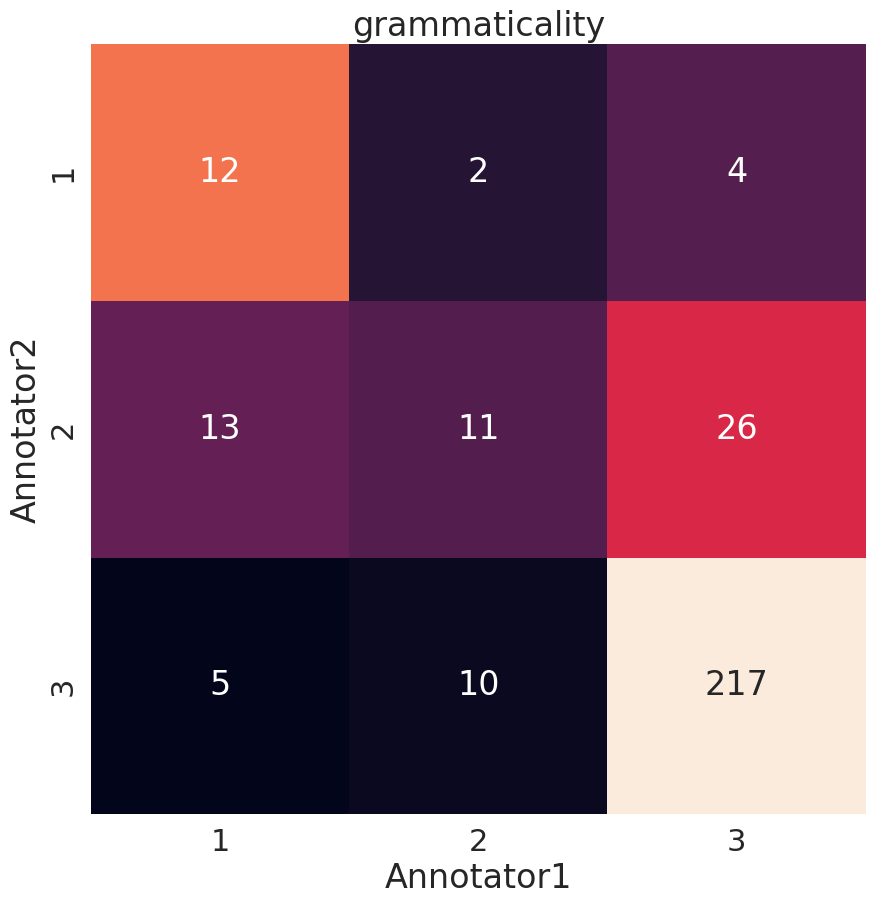

In [16]:
cm_analysis(grammaticality1, grammaticality2, labels=[1, 2, 3], classes=[1, 2, 3], criteria='grammaticality', ymap=None)